0  :  3
1  :  0
2  :  0
3  :  0
4  :  0
5  :  5
6  :  3
7  :  1
8  :  1
9  :  0
10  :  0
11  :  0
12  :  0
13  :  0
14  :  0
15  :  0
16  :  0
17  :  0
18  :  0
19  :  0
20  :  0
21  :  0
22  :  0
23  :  0
24  :  0
25  :  0
26  :  0
27  :  0
28  :  0
29  :  0
30  :  0
31  :  0
32  :  0
33  :  0
34  :  0
35  :  0
36  :  0
37  :  0
38  :  0
39  :  0
40  :  0
41  :  0
42  :  0
43  :  0
44  :  0
45  :  0
46  :  0
47  :  0
48  :  0
49  :  0
50  :  0
51  :  0
52  :  0
53  :  0
54  :  0
55  :  0
56  :  0
57  :  0
58  :  0
59  :  0
60  :  0
61  :  0
62  :  0
63  :  0
64  :  0
65  :  0
66  :  0
67  :  0
68  :  0
69  :  0
70  :  0
71  :  0
72  :  0
73  :  0
74  :  0
75  :  0
76  :  0
77  :  0
78  :  0
79  :  0
80  :  0
81  :  0
82  :  0
83  :  0
84  :  0
85  :  0
86  :  0
87  :  0
88  :  0
89  :  0
90  :  0
91  :  0
92  :  0
93  :  0
94  :  0
95  :  0
96  :  0
97  :  0
98  :  0
99  :  0


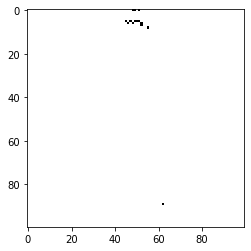

In [2]:
from picar_4wd.pwm import PWM
from picar_4wd.adc import ADC
from picar_4wd.pin import Pin
from picar_4wd.motor import Motor
from picar_4wd.servo import Servo
from picar_4wd.ultrasonic import Ultrasonic 
from picar_4wd.speed import Speed
from picar_4wd.filedb import FileDB  
from picar_4wd.utils import *
import time
import numpy as np
import math
import matplotlib.pyplot as plt


ANGLE_RANGE = 100
STEP = 8
us_step = STEP
angle_distance = [0,0]
current_angle = 0
max_angle = ANGLE_RANGE/2
min_angle = -ANGLE_RANGE/2

# Init Ultrasonic
us = Ultrasonic(Pin('D8'), Pin('D9'))
servo = Servo(PWM("P0"), offset=0)

def get_distance():
    global current_angle, us_step
    current_angle += us_step
    if current_angle >= max_angle:
        current_angle = max_angle
        us_step = -STEP
    elif current_angle <= min_angle:
        current_angle = min_angle
        us_step = STEP
    
    servo.set_angle(current_angle)
    time.sleep(0.04)
    
    dist = us.get_distance()

    return current_angle, dist

carposition = (50, 0)
mappingarr = np.zeros((100, 100), dtype=int)

touched_both = 0
while touched_both != 2:

    current_angle, dist = get_distance()

    touched_both += current_angle == ANGLE_RANGE / 2 or current_angle == -ANGLE_RANGE / 2

    x = dist * math.sin(math.radians(current_angle))
    y = dist * math.cos(math.radians(current_angle))

    x = int(carposition[0] + x)
    y = int(carposition[1] + y)

    x = 0 if x < 0 else x
    x = 99 if x >= 100 else x
    y = 0 if y < 0 else y
    y = 99 if y >= 100 else y
    #print("angle ", current_angle, " at distance: ", dist, " ", x, " ", y)
    
    mappingarr[y][x] = 1

plt.imshow(mappingarr,interpolation='nearest',cmap=plt.cm.gray_r)

cnt = 0
for i in mappingarr:
    print(cnt, " : ", sum(i[40:60]))
    cnt+=1

#plt.plot(mappingarr)
#plt.show()
